In [1]:
# 일단 하나만 보기 

import pandas as pd
import os

# 데이터가 들어있는 경로
file_path = "../data/raw/features_1.csv" # 파일명이 features_1.csv 가 맞는지 확인해줘!

# 데이터 읽기
df = pd.read_csv(file_path)

# 1. 어떤 컬럼(열)들이 있는지 확인
print("--- 컬럼 이름들 ---")
print(df.columns.tolist())

# 2. 데이터가 어떻게 생겼는지 5줄만 보기
# print("\n--- 데이터 샘플 ---")
# display(df.head())

--- 컬럼 이름들 ---
['Image', 'Object ID', 'Object type', 'Name', 'Classification', 'Parent', 'ROI', 'Centroid X µm', 'Centroid Y µm', 'Area µm^2', 'Length µm', 'Circularity', 'Solidity', 'Max diameter µm', 'Min diameter µm', 'Hematoxylin: Mean', 'Hematoxylin: Median', 'Hematoxylin: Min', 'Hematoxylin: Max', 'Hematoxylin: Std.Dev.', 'DAB: Mean', 'DAB: Median', 'DAB: Min', 'DAB: Max', 'DAB: Std.Dev.', 'AR (calc Max/Min)', 'Eccentricity (Feret-approx)', 'Perimeter µm']


In [2]:
# 전체 파일 (1~9) 다 보기

import glob

# 1. raw 폴더 안의 모든 csv 파일 경로 가져오기
all_files = glob.glob("../data/raw/*.csv")
print(f"발견된 파일들: {all_files}")

# 2. 모든 파일을 읽어서 리스트에 담기
li = []
for filename in all_files:
    temp_df = pd.read_csv(filename)
    temp_df['Source_File'] = os.path.basename(filename) # 어느 파일 출신인지 기록하는 센스!
    li.append(temp_df)

# 3. 하나로 합치기 (Concat)
df = pd.concat(li, axis=0, ignore_index=True)

print(f"전체 데이터 개수: {len(df)}개")
print(f"전체 컬럼 개수: {len(df.columns)}개")

# 4. 가장 중요한 '정답'의 분포 확인하기
print("\n--- [Classification 분포] ---")
print(df['Classification'].value_counts())
print("\n--- [비율 %] ---")
print(df['Classification'].value_counts(normalize=True) * 100)

발견된 파일들: ['../data/raw\\features_1.csv', '../data/raw\\features_2.csv', '../data/raw\\features_3.csv', '../data/raw\\features_4.csv', '../data/raw\\features_5.csv', '../data/raw\\features_6.csv', '../data/raw\\features_7.csv', '../data/raw\\features_8.csv', '../data/raw\\features_9.csv']
전체 데이터 개수: 23792개
전체 컬럼 개수: 30개

--- [Classification 분포] ---
Classification
Proliferative     14467
Hypertrophic       5202
Undetermined_2     1889
Undetermined_1     1889
Resting             251
resting_temp         53
Uncertain            32
Growth Plate          9
Name: count, dtype: int64

--- [비율 %] ---
Classification
Proliferative     60.806153
Hypertrophic      21.864492
Undetermined_2     7.939644
Undetermined_1     7.939644
Resting            1.054976
resting_temp       0.222764
Uncertain          0.134499
Growth Plate       0.037828
Name: proportion, dtype: float64


In [3]:
# resting_temp를 Resting으로 바꾸기 ! 

df['Classification'] = df['Classification'].replace('resting_temp', 'Resting')

In [4]:
# 4. 가장 중요한 '정답'의 분포 확인하기
print("\n--- [Classification 분포] ---")
print(df['Classification'].value_counts())
print("\n--- [비율 %] ---")
print(df['Classification'].value_counts(normalize=True) * 100)


--- [Classification 분포] ---
Classification
Proliferative     14467
Hypertrophic       5202
Undetermined_2     1889
Undetermined_1     1889
Resting             304
Uncertain            32
Growth Plate          9
Name: count, dtype: int64

--- [비율 %] ---
Classification
Proliferative     60.806153
Hypertrophic      21.864492
Undetermined_2     7.939644
Undetermined_1     7.939644
Resting            1.277740
Uncertain          0.134499
Growth Plate       0.037828
Name: proportion, dtype: float64


In [5]:
# 클래스 정제

# 1. 유지할 5개 클래스 정의
target_classes = [
    'Hypertrophic', 
    'Undetermined_1', 
    'Proliferative', 
    'Undetermined_2', 
    'Resting'
]

# 2. 필터링: 정의된 클래스만 남기기
df_final = df[df['Classification'].isin(target_classes)].copy()

# 3. 데이터 무결성 확인 (NaN 체크)
print("--- [데이터 정제 결과] ---")
print(f"남은 데이터 개수: {len(df_final)}개")
print(f"제거된 노이즈 개수: {len(df) - len(df_final)}개")

print("\n--- [최종 클래스별 샘플 수] ---")
print(df_final['Classification'].value_counts())

# 4. 결측치(NaN) 최종 확인
nan_check = df_final.isnull().sum()
if nan_check.sum() > 0:
    print("\n⚠️ 결측치가 발견된 컬럼:")
    print(nan_check[nan_check > 0])
else:
    print("\n✅ 결측치 없음: 깨끗한 데이터입니다.")

--- [데이터 정제 결과] ---
남은 데이터 개수: 23751개
제거된 노이즈 개수: 41개

--- [최종 클래스별 샘플 수] ---
Classification
Proliferative     14467
Hypertrophic       5202
Undetermined_2     1889
Undetermined_1     1889
Resting             304
Name: count, dtype: int64

⚠️ 결측치가 발견된 컬럼:
Name                           23751
Length µm                         47
Circularity                       54
Solidity                          47
Max diameter µm                   47
Min diameter µm                   47
Hematoxylin: Mean                787
Hematoxylin: Median              787
Hematoxylin: Min                 787
Hematoxylin: Max                 787
Hematoxylin: Std.Dev.            787
DAB: Mean                        787
DAB: Median                      787
DAB: Min                         787
DAB: Max                         787
DAB: Std.Dev.                    787
AR (calc Max/Min)                 47
Eccentricity (Feret-approx)       47
Perimeter µm                      10
Column ID                      21434
dtyp

In [6]:
# 무의미한 칼럼 삭제

cols_to_drop = ['Name', 'Column ID', 'Parent', 'Object ID', 'Object type', 'ROI', 'Centroid Y µm']
df_filtered = df_final.drop(columns=[c for c in cols_to_drop if c in df_final.columns])

In [7]:
# 결측치(NaN)가 하나라도 있는 행(Row)은 모두 삭제

df_pure = df_filtered.dropna()

In [8]:
# 중간 결과

print("--- [정화 작업 결과] ---")
print(f"원본 데이터 행: {len(df_final)}")
print(f"정화 후 데이터 행: {len(df_pure)}")
print(f"삭제된 행 개수: {len(df_final) - len(df_pure)} ({((len(df_final)-len(df_pure))/len(df_final)*100):.2f}%)")

--- [정화 작업 결과] ---
원본 데이터 행: 23751
정화 후 데이터 행: 22964
삭제된 행 개수: 787 (3.31%)


In [9]:
# 클래스별 분포 재확인

print("\n--- [최종 클래스별 분포] ---")
new_dist = df_pure['Classification'].value_counts()
new_pct = df_pure['Classification'].value_counts(normalize=True) * 100

dist_comparison = pd.DataFrame({
    'Count': new_dist,
    'Percentage (%)': new_pct
})
print(dist_comparison)


--- [최종 클래스별 분포] ---
                Count  Percentage (%)
Classification                       
Proliferative   13993       60.934506
Hypertrophic     5083       22.134646
Undetermined_1   1843        8.025605
Undetermined_2   1792        7.803519
Resting           253        1.101724


In [10]:
# 컬럼명과 타입을 데이터프레임 형태로 예쁘게 보기
dtype_df = pd.DataFrame(df_pure.dtypes, columns=['Data Type'])
dtype_df['Non-Null Count'] = df_pure.notnull().sum()
display(dtype_df)

,Data Type,Non-Null Count
Image,object,22964
Classification,object,22964
Centroid X µm,float64,22964
Area µm^2,float64,22964
Length µm,float64,22964
Circularity,float64,22964
Solidity,float64,22964
Max diameter µm,float64,22964
Min diameter µm,float64,22964
Hematoxylin: Mean,float64,22964


In [11]:
# 이미지별(Source_File 기준)로 Centroid X의 최소/최대값을 이용해 정규화
# (X - min) / (max - min) 공식을 사용해서 0~1 사이로 변환해
df_pure['Relative_Pos_X'] = df_pure.groupby('Source_File')['Centroid X µm'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min()) if (x.max() - x.min()) != 0 else 0
)

C:\Users\apple\AppData\Local\Temp\ipykernel_2368\2688814594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pure['Relative_Pos_X'] = df_pure.groupby('Source_File')['Centroid X µm'].transform(


In [12]:
# 결과 확인: 새로운 피처가 잘 만들어졌는지 샘플 확인
print("--- [신규 피처: Relative_Pos_X 확인] ---")
display(df_pure[['Source_File', 'Classification', 'Centroid X µm', 'Relative_Pos_X']].tail())

--- [신규 피처: Relative_Pos_X 확인] ---


,Source_File,Classification,Centroid X µm,Relative_Pos_X
23787,features_9.csv,Proliferative,1954.5,0.469692
23788,features_9.csv,Proliferative,1805.4,0.208479
23789,features_9.csv,Undetermined_2,1864.1,0.311317
23790,features_9.csv,Undetermined_1,1944.4,0.451997
23791,features_9.csv,Proliferative,1990.4,0.532586


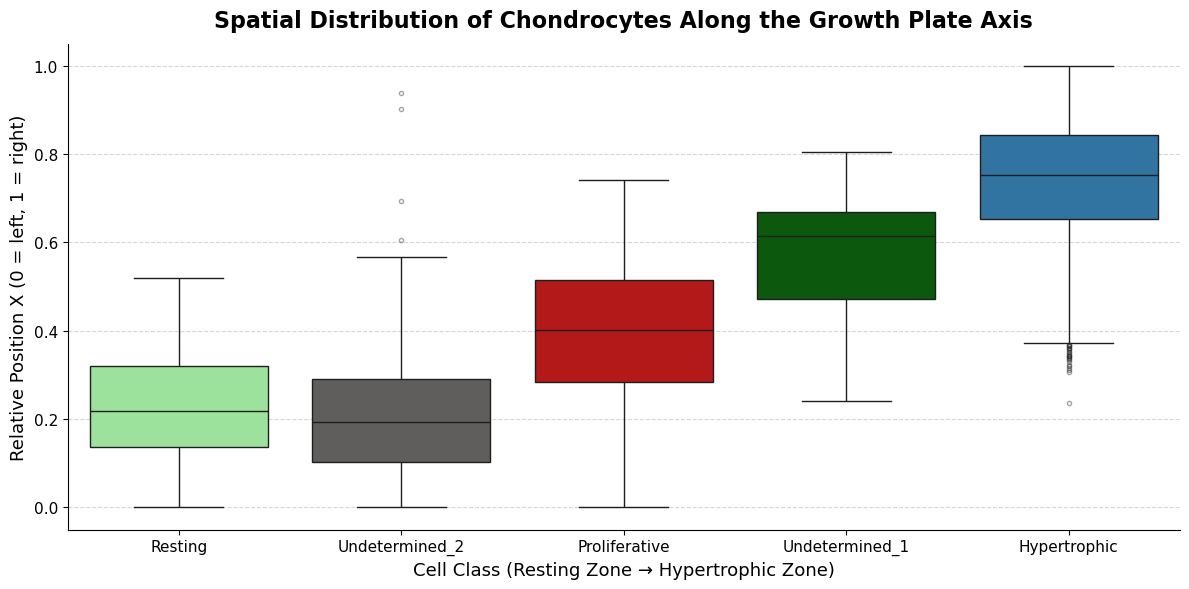

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

bio_order = ['Resting', 'Undetermined_2', 'Proliferative', 'Undetermined_1', 'Hypertrophic']

class_colors = {
    'Resting':        '#90EE90',  # 연두색
    'Undetermined_2': "#605D5DD6",  # 회색
    'Proliferative':  '#CC0000',  # 빨간색
    'Undetermined_1': '#006400',  # 진초록색
    'Hypertrophic':   '#1F77B4',  # 파란색
}

plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df_pure,
    x='Classification',
    y='Relative_Pos_X',
    order=bio_order,
    hue='Classification',
    palette=class_colors,
    legend=False,
    flierprops=dict(marker='o', markersize=3, alpha=0.4),
)

plt.title('Spatial Distribution of Chondrocytes Along the Growth Plate Axis',
          fontsize=16, fontweight='bold', pad=12)
plt.xlabel('Cell Class (Resting Zone → Hypertrophic Zone)', fontsize=13)
plt.ylabel('Relative Position X (0 = left, 1 = right)', fontsize=13)
plt.tick_params(axis='both', labelsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

In [16]:
# 이제 목적을 달성했으니 원본 좌표, Image 삭제
final_drop = ['Centroid X µm', 'Image']
df_final_features = df_pure.drop(columns=final_drop)

print(f"\n✅ 최종 데이터 셋 준비 완료! (행: {len(df_final_features)}, 열: {len(df_final_features.columns)})")


✅ 최종 데이터 셋 준비 완료! (행: 22964, 열: 22)


In [17]:
# 컬럼명과 타입을 데이터프레임 형태로 예쁘게 보기
dtype_df = pd.DataFrame(df_final_features.dtypes, columns=['Data Type'])
dtype_df['Non-Null Count'] = df_pure.notnull().sum()
display(dtype_df)

,Data Type,Non-Null Count
Classification,object,22964
Area µm^2,float64,22964
Length µm,float64,22964
Circularity,float64,22964
Solidity,float64,22964
Max diameter µm,float64,22964
Min diameter µm,float64,22964
Hematoxylin: Mean,float64,22964
Hematoxylin: Median,float64,22964
Hematoxylin: Min,float64,22964


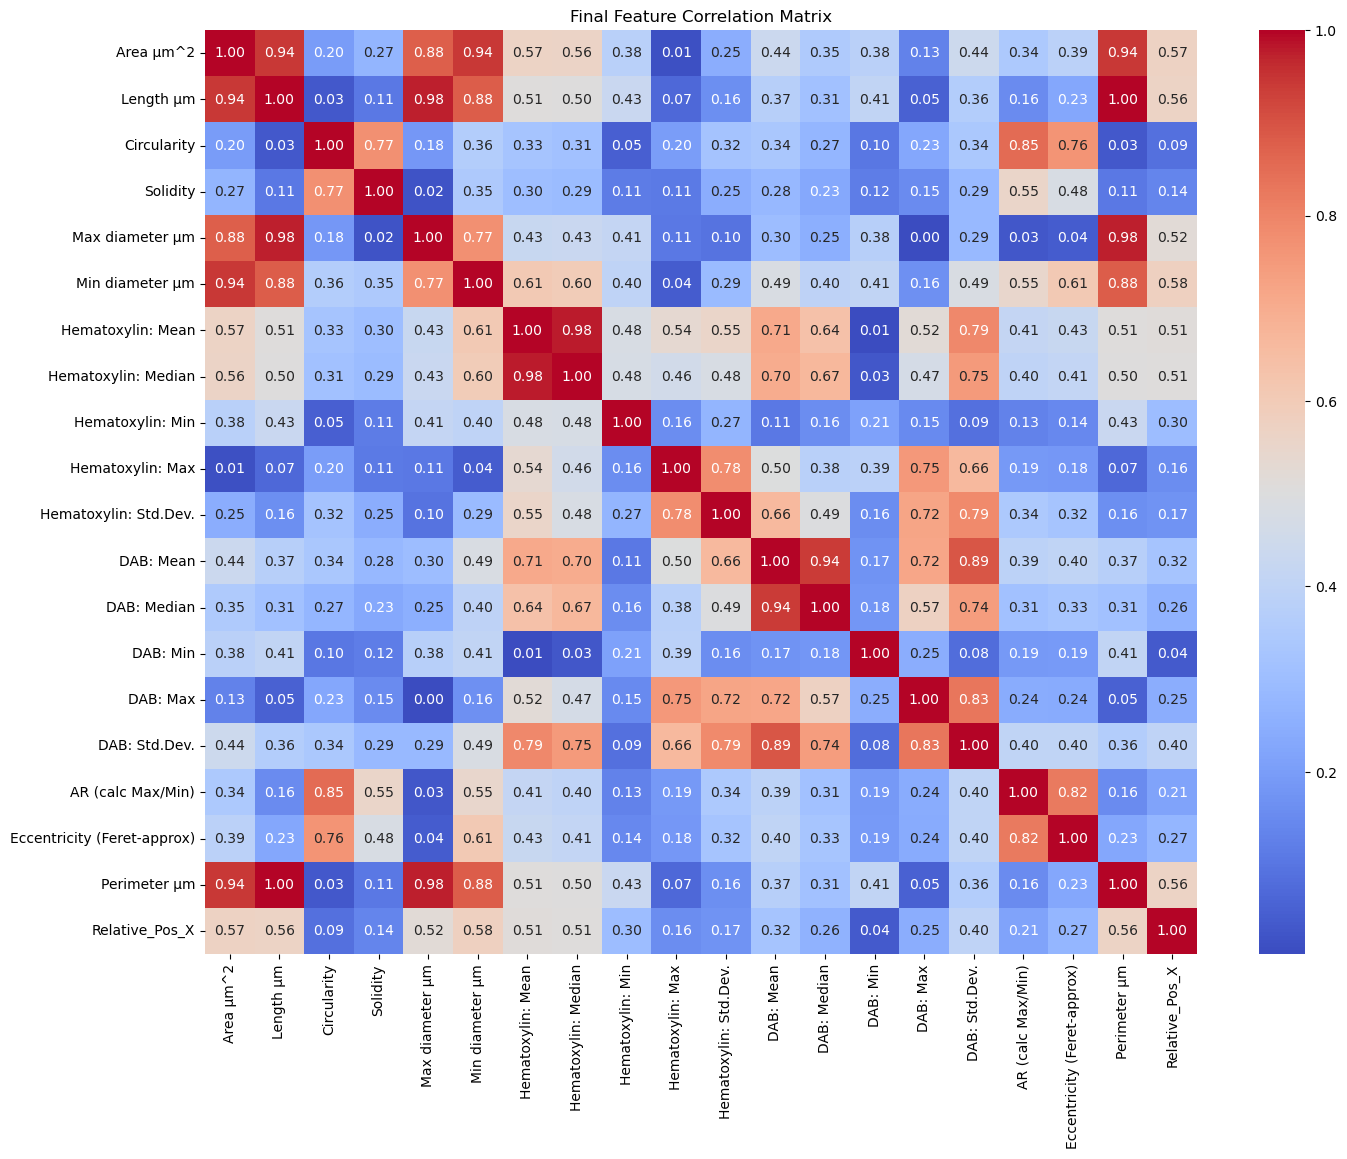

🚩 정보 중복이 심해 삭제를 고려할 피처 (3개):
['Max diameter µm', 'Hematoxylin: Median', 'Perimeter µm']


In [18]:
# 피처 상관관계 확인

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. 수치형 피처만 선택 (Classification과 Source_File 제외)
analysis_df = df_final_features.select_dtypes(include=[np.number])

# 2. 상관관계 행렬 계산
corr_matrix = analysis_df.corr().abs()

# 3. 히트맵 시각화
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Final Feature Correlation Matrix")
plt.show()

# 4. 상관관계가 0.95 이상인 피처 쌍 리스트업
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(f"🚩 정보 중복이 심해 삭제를 고려할 피처 ({len(to_drop)}개):")
print(to_drop)

In [19]:
# 선정된 중복 피처 제거
to_drop = ['Max diameter µm', 'Hematoxylin: Median', 'Perimeter µm']
df_final_features = df_final_features.drop(columns=to_drop)

In [20]:
print(f"✅ 정제 완료! 현재 남은 피처 수: {len(df_final_features.columns)}개")
print(f"📊 남은 컬럼 리스트: \n{df_final_features.columns.tolist()}")

✅ 정제 완료! 현재 남은 피처 수: 19개
📊 남은 컬럼 리스트: 
['Classification', 'Area µm^2', 'Length µm', 'Circularity', 'Solidity', 'Min diameter µm', 'Hematoxylin: Mean', 'Hematoxylin: Min', 'Hematoxylin: Max', 'Hematoxylin: Std.Dev.', 'DAB: Mean', 'DAB: Median', 'DAB: Min', 'DAB: Max', 'DAB: Std.Dev.', 'AR (calc Max/Min)', 'Eccentricity (Feret-approx)', 'Source_File', 'Relative_Pos_X']


In [21]:
# 컬럼명과 타입을 데이터프레임 형태로 예쁘게 보기
dtype_df = pd.DataFrame(df_final_features.dtypes, columns=['Data Type'])
dtype_df['Non-Null Count'] = df_pure.notnull().sum()
display(dtype_df)

,Data Type,Non-Null Count
Classification,object,22964
Area µm^2,float64,22964
Length µm,float64,22964
Circularity,float64,22964
Solidity,float64,22964
Min diameter µm,float64,22964
Hematoxylin: Mean,float64,22964
Hematoxylin: Min,float64,22964
Hematoxylin: Max,float64,22964
Hematoxylin: Std.Dev.,float64,22964


In [63]:
import os

# 저장할 폴더 생성 (없으면 만들기)
processed_path = "../data/processed"
if not os.path.exists(processed_path):
    os.makedirs(processed_path)
    print(f"📁 폴더 생성 완료: {processed_path}")

# 최종 정제된 데이터 저장 (index=False는 필수!)
file_name = "cleaned_features.csv"
df_final_features.to_csv(os.path.join(processed_path, file_name), index=False)

print(f"✅ 체크포인트 저장 성공: {os.path.join(processed_path, file_name)}")

✅ 체크포인트 저장 성공: ../data/processed\cleaned_features.csv
